In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import struct
import sys
import time
from model.MET import *
from model.MET_Meta import *

In [2]:
# Real World Data
# 'd' for double, 'l' for uint
datafile = open('./data/iot_unix.uint64','rb')
data = datafile.read(8)
data_len, = struct.unpack('l', data)
data_len = int(data_len)
data=[]
for i in tqdm(range(data_len)):
    data_bin = datafile.read(8)
    data_unix, = struct.unpack('l',data_bin)
    data.append(data_unix)

100%|██████████| 15190092/15190092 [00:10<00:00, 1408006.13it/s]


In [4]:
epsilon_list = list(range(25,400,25))
MET_Index_seg_num = []
MET_Index_mae = []
starttime = time.perf_counter()
for i in range(len(epsilon_list)):
    epsilon = epsilon_list[i]
    MET_Index = MET(epsilon)
    MET_Index.learn_index_lookahead(data)
    MET_Index_seg_num.append(MET_Index.seg_num)
    MET_Index_mae.append(MET_Index.mae)
endtime = time.perf_counter()
avg_time = (starttime - endtime) / len(epsilon_list)
avg_time

  0%|          | 0/15190092 [00:00<?, ?it/s]

38255 7.192776383447842


  0%|          | 0/15190092 [00:00<?, ?it/s]

17809 13.808527492789379


  0%|          | 0/15190092 [00:00<?, ?it/s]

12280 20.38959816701571


  0%|          | 0/15190092 [00:00<?, ?it/s]

9539 27.21217639761497


  0%|          | 0/15190092 [00:00<?, ?it/s]

7590 34.34141353455924


  0%|          | 0/15190092 [00:00<?, ?it/s]

6425 41.729074517784355


  0%|          | 0/15190092 [00:00<?, ?it/s]

5412 48.30562955115742


  0%|          | 0/15190092 [00:00<?, ?it/s]

4736 55.38693834112394


  0%|          | 0/15190092 [00:00<?, ?it/s]

4311 62.66834637999559


  0%|          | 0/15190092 [00:00<?, ?it/s]

4016 69.90190230579249


  0%|          | 0/15190092 [00:00<?, ?it/s]

3789 77.88248589936124


  0%|          | 0/15190092 [00:00<?, ?it/s]

3599 85.93401547535065


  0%|          | 0/15190092 [00:00<?, ?it/s]

3398 94.08706859708289


  0%|          | 0/15190092 [00:00<?, ?it/s]

3183 101.38712767506608


100%|██████████| 15190092/15190092 [00:46<00:00, 329693.68it/s]

2999 106.93165255351975


-47.86509633635481

In [5]:
epsilon_list = list(range(25,400,25))
MET_Meta_Index_seg_num_withBound = []
MET_Meta_Index_mae_withBound = []
starttime = time.perf_counter()
for i in range(len(epsilon_list)):
    MET_Meta_Index = MET_Meta(epsilon_list[i],init_epsilon=range(25,400,25),low=1,high=1000,withBound=True)
    MET_Meta_Index.learn_index_lookahead(data)
    MET_Meta_Index_seg_num_withBound.append(MET_Meta_Index.seg_num)
    MET_Meta_Index_mae_withBound.append(MET_Meta_Index.mae)
endtime = time.perf_counter()
avg_time = (starttime - endtime) / len(epsilon_list)
avg_time

100%|██████████| 15190092/15190092 [00:54<00:00, 279929.80it/s]


32592 7.571270272754108


100%|██████████| 15190092/15190092 [00:47<00:00, 323148.40it/s]


15257 14.90942122009531


100%|██████████| 15190092/15190092 [00:43<00:00, 345823.79it/s]


10454 22.59514636251051


100%|██████████| 15190092/15190092 [00:42<00:00, 358373.21it/s]


7914 30.496399560976982


100%|██████████| 15190092/15190092 [00:42<00:00, 358553.21it/s]


6450 38.97540613973898


100%|██████████| 15190092/15190092 [00:42<00:00, 354708.10it/s]


5450 46.7283225802714


100%|██████████| 15190092/15190092 [00:43<00:00, 350240.75it/s]


4745 54.13627139322132


100%|██████████| 15190092/15190092 [00:44<00:00, 344167.98it/s]


4320 61.83580810438804


100%|██████████| 15190092/15190092 [00:44<00:00, 344108.88it/s]


4054 69.6589499260439


100%|██████████| 15190092/15190092 [00:44<00:00, 344660.00it/s]


3714 79.16100455481113


100%|██████████| 15190092/15190092 [00:45<00:00, 335430.36it/s]


3440 86.30182996916675


100%|██████████| 15190092/15190092 [00:44<00:00, 341575.90it/s]


3228 95.8947543569848


100%|██████████| 15190092/15190092 [00:41<00:00, 366093.11it/s]


3061 100.79315411651227


100%|██████████| 15190092/15190092 [00:41<00:00, 363056.36it/s]


2856 107.54209375427088


100%|██████████| 15190092/15190092 [00:41<00:00, 366647.59it/s]

2738 115.83398448146332


-45.47984241868059

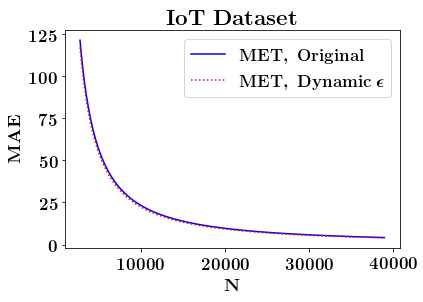

In [9]:
x = np.arange(2700,39000)
import matplotlib.pylab as pylab
label_size = 18.5
ticks_size = 17
title_size = 22.5
legend_size = 17
params = {'legend.fontsize': legend_size,
          'axes.labelsize': label_size,
          'axes.titlesize': title_size,
          'xtick.labelsize': ticks_size,
          'ytick.labelsize': ticks_size}
pylab.rcParams.update(params)
plt.rcParams["text.usetex"] = True
plt.rcParams['text.latex.preamble'] = [r'\boldmath']
markers = ["v", "^", "o", "<", ">", "1", "2", "3", "4"]
colors = ["b", "r", "g", "purple", "teal", "tomato", "olive", "deeppink"]
linestyles = ['solid', 'dotted', '-.', ':', "--", (0, (3, 10, 1, 10)), (0, (3, 5, 1, 5, 1, 5)),
              (0, (5, 10))]

plt.title('$\mathrm{IoT~Dataset}$')
plt.xlabel('$\mathrm{N}$')
plt.ylabel('$\mathrm{MAE}$')
plt.xticks()
plt.yticks()
def func(x,a,b):
    return a * x**b
p1,_ = curve_fit(func,MET_Index_seg_num,MET_Index_mae)
p2,_ = curve_fit(func,MET_Meta_Index_seg_num_withBound,MET_Meta_Index_mae_withBound)
#p3,_ = curve_fit(func,PGM_Index_seg_num,PGM_Index_mae)
#p4,_ = curve_fit(func,MET_Meta_Index_seg_num_withBound,MET_Meta_Index_mae_withBound)
plt.plot(x,p1[0]*x**p1[1],c=colors[0], linestyle=linestyles[0], label='$\mathrm{MET,~Original}$')
#plt.scatter(MET_Index_seg_num, MET_Index_mae,c=colors[0],marker=markers[0])
plt.plot(x,p2[0]*x**p2[1],c=colors[1], linestyle=linestyles[1], label='$\mathrm{MET,~Dynamic~\epsilon}$')
#plt.scatter(MET_Meta_Index_seg_num_withBound, MET_Meta_Index_mae_withBound,c=colors[1],marker=markers[1])
plt.legend()
#plt.savefig("{}.pdf".format("results/MET/IoT_tradeoff_30"), bbox_inches='tight', pad_inches=0)

In [7]:
def calc_AUC(x,y):
    area=0
    for i in range(len(x)-1):
        area += (y[i]+y[i+1])*(x[i+1]-x[i]) / 2 
    return area
AUC1 = calc_AUC(x,p1[0]*x**p1[1])
AUC2 = calc_AUC(x,p2[0]*x**p2[1])
#AUC3 = calc_AUC(x,p3[0]*x**p3[1])
AUC1,AUC2,1-AUC2/AUC1

(626757.75775372, 600478.3354044431, 0.041929153686843135)

In [3]:
epsilon_list = list(range(25,400,25))
MET_Index_seg_num_list = []
MET_Index_mae_list = []
look_list = np.arange(0.1,1,0.2)
for lookn in look_list:    
    MET_Index_seg_num = []
    MET_Index_mae = []
    for i in range(len(epsilon_list)):
        MET_Index = MET(epsilon_list[i])
        MET_Index.learn_index_lookahead(data,lookn=lookn)
        MET_Index_seg_num.append(MET_Index.seg_num)
        MET_Index_mae.append(MET_Index.mae)
    MET_Index_seg_num_list.append(MET_Index_seg_num)
    MET_Index_mae_list.append(MET_Index_mae)

  0%|          | 0/15190092 [00:00<?, ?it/s]

63484 8.375875866979607


  0%|          | 0/15190092 [00:00<?, ?it/s]

29043 15.729095781645036


  0%|          | 0/15190092 [00:00<?, ?it/s]

19030 22.910580330915703


  0%|          | 0/15190092 [00:00<?, ?it/s]

14322 29.796156731637964


  0%|          | 0/15190092 [00:00<?, ?it/s]

11657 37.076218761545356


  0%|          | 0/15190092 [00:00<?, ?it/s]

9661 43.93073623253895


  0%|          | 0/15190092 [00:00<?, ?it/s]

8341 51.86453400018907


  0%|          | 0/15190092 [00:00<?, ?it/s]

7341 59.16224259866234


  0%|          | 0/15190092 [00:00<?, ?it/s]

6514 67.3049480542975


  0%|          | 0/15190092 [00:00<?, ?it/s]

5895 74.55804204477498


  0%|          | 0/15190092 [00:00<?, ?it/s]

5438 83.008664002825


  0%|          | 0/15190092 [00:00<?, ?it/s]

5157 92.41982444872619


  0%|          | 0/15190092 [00:00<?, ?it/s]

4782 101.31781380915929


  0%|          | 0/15190092 [00:00<?, ?it/s]

4420 109.81621506966515


  0%|          | 0/15190092 [00:00<?, ?it/s]

4213 115.96154052259854


  0%|          | 0/15190092 [00:00<?, ?it/s]

39792 7.248005081206881


  0%|          | 0/15190092 [00:00<?, ?it/s]

18585 13.794935211715636


  0%|          | 0/15190092 [00:00<?, ?it/s]

13133 20.246350450017026


  0%|          | 0/15190092 [00:00<?, ?it/s]

10072 26.61973528534258


  0%|          | 0/15190092 [00:00<?, ?it/s]

8181 33.18494074953595


  0%|          | 0/15190092 [00:00<?, ?it/s]

6905 40.37056938167326


100%|██████████| 15190092/15190092 [00:37<00:00, 399752.83it/s]


6013 47.83401404020463


  0%|          | 0/15190092 [00:00<?, ?it/s]

5353 55.80633784179846


  0%|          | 0/15190092 [00:00<?, ?it/s]

4772 63.05263240011976


100%|██████████| 15190092/15190092 [00:37<00:00, 402204.30it/s]


4314 69.42318328289257


  0%|          | 0/15190092 [00:00<?, ?it/s]

4039 76.79329401033253


  0%|          | 0/15190092 [00:00<?, ?it/s]

3800 84.9978897428666


  0%|          | 0/15190092 [00:00<?, ?it/s]

3540 92.64657712408852


  0%|          | 0/15190092 [00:00<?, ?it/s]

3441 99.84170945113434


  0%|          | 0/15190092 [00:00<?, ?it/s]

3261 104.63727520544313


  0%|          | 0/15190092 [00:00<?, ?it/s]

38786 7.206551283560363


  0%|          | 0/15190092 [00:00<?, ?it/s]

17800 13.963190611353768


  0%|          | 0/15190092 [00:00<?, ?it/s]

12370 20.786229866152226


100%|██████████| 15190092/15190092 [00:37<00:00, 399834.24it/s]


9473 27.886143678392468


  0%|          | 0/15190092 [00:00<?, ?it/s]

7549 34.89091896217614


  0%|          | 0/15190092 [00:00<?, ?it/s]

6298 42.388057557518415


  0%|          | 0/15190092 [00:00<?, ?it/s]

5355 49.68500585776571


  0%|          | 0/15190092 [00:00<?, ?it/s]

4758 57.47105027408656


  0%|          | 0/15190092 [00:00<?, ?it/s]

4338 64.58140865769609


  0%|          | 0/15190092 [00:00<?, ?it/s]

4054 71.74373749678409


  0%|          | 0/15190092 [00:00<?, ?it/s]

3709 79.93737569199712


  0%|          | 0/15190092 [00:00<?, ?it/s]

3478 87.55086980381685


  0%|          | 0/15190092 [00:00<?, ?it/s]

3258 94.87516349473064


  0%|          | 0/15190092 [00:00<?, ?it/s]

3081 104.01506231825324


  0%|          | 0/15190092 [00:00<?, ?it/s]

2884 110.74664103416885


  0%|          | 0/15190092 [00:00<?, ?it/s]

40685 7.238995590020126


  0%|          | 0/15190092 [00:00<?, ?it/s]

19215 14.233745654733362


100%|██████████| 15190092/15190092 [00:38<00:00, 398503.81it/s]


13063 21.761182552416404


  0%|          | 0/15190092 [00:00<?, ?it/s]

9745 29.177781082563556


  0%|          | 0/15190092 [00:00<?, ?it/s]

7896 36.42277347628968


  0%|          | 0/15190092 [00:00<?, ?it/s]

6499 44.69392377610353


  0%|          | 0/15190092 [00:00<?, ?it/s]

5715 51.85858189667317


  0%|          | 0/15190092 [00:00<?, ?it/s]

5044 59.812173421991126


100%|██████████| 15190092/15190092 [00:37<00:00, 401936.39it/s]


4618 67.41253338031133


100%|██████████| 15190092/15190092 [00:37<00:00, 401820.68it/s]


4274 74.49605545509533


  0%|          | 0/15190092 [00:00<?, ?it/s]

3981 83.64404988462216


  0%|          | 0/15190092 [00:00<?, ?it/s]

3639 90.6805426194917


  0%|          | 0/15190092 [00:00<?, ?it/s]

3358 98.34048174296773


  0%|          | 0/15190092 [00:00<?, ?it/s]

3151 107.95030872755741


  0%|          | 0/15190092 [00:00<?, ?it/s]

3007 115.53669846107582


  0%|          | 0/15190092 [00:00<?, ?it/s]

43023 7.296577466416925


  0%|          | 0/15190092 [00:00<?, ?it/s]

20888 14.83627604098777


100%|██████████| 15190092/15190092 [00:38<00:00, 393716.56it/s]


14036 22.449199254356063


  0%|          | 0/15190092 [00:00<?, ?it/s]

10563 29.989241473981856


  0%|          | 0/15190092 [00:00<?, ?it/s]

8516 37.996419508189945


  0%|          | 0/15190092 [00:00<?, ?it/s]

7139 46.05642085643721


  0%|          | 0/15190092 [00:00<?, ?it/s]

6268 53.619526860008484


  0%|          | 0/15190092 [00:00<?, ?it/s]

5555 61.707800716414354


  0%|          | 0/15190092 [00:00<?, ?it/s]

5039 69.63892430671255


  0%|          | 0/15190092 [00:00<?, ?it/s]

4550 77.2360551864992


  0%|          | 0/15190092 [00:00<?, ?it/s]

4136 86.20534727505272


100%|██████████| 15190092/15190092 [00:38<00:00, 397646.90it/s]


3882 93.80885658888702


  0%|          | 0/15190092 [00:00<?, ?it/s]

3591 102.73021993546847


  0%|          | 0/15190092 [00:00<?, ?it/s]

3312 110.11915964695935


100%|██████████| 15190092/15190092 [00:37<00:00, 401865.14it/s]

3079 118.91180112668178


In [4]:
epsilon_list = list(range(25,400,25))
MET_Meta_Index_seg_num_withBound_list = []
MET_Meta_Index_mae_withBound_list = []
look_list = np.arange(0.1,1,0.2)
for lookn in look_list:    
    MET_Meta_Index_seg_num_withBound = []
    MET_Meta_Index_mae_withBound = []
    for i in range(len(epsilon_list)):
        MET_Meta_Index = MET_Meta(epsilon_list[i],init_epsilon=range(25,400,25),low=1,high=1000,withBound=True)
        MET_Meta_Index.learn_index_lookahead(data,lookn=lookn)
        MET_Meta_Index_seg_num_withBound.append(MET_Meta_Index.seg_num)
        MET_Meta_Index_mae_withBound.append(MET_Meta_Index.mae)
    MET_Meta_Index_seg_num_withBound_list.append(MET_Meta_Index_seg_num_withBound)
    MET_Meta_Index_mae_withBound_list.append(MET_Meta_Index_mae_withBound)

100%|██████████| 15190092/15190092 [00:46<00:00, 323839.50it/s]


66830 8.88078551466311


100%|██████████| 15190092/15190092 [00:42<00:00, 356259.44it/s]


26989 18.46217824092178


100%|██████████| 15190092/15190092 [00:41<00:00, 366250.76it/s]


17022 27.113429135254744


100%|██████████| 15190092/15190092 [00:40<00:00, 371892.24it/s]


12362 36.20266513198209


100%|██████████| 15190092/15190092 [00:40<00:00, 374164.26it/s]


10115 44.47673983804707


100%|██████████| 15190092/15190092 [00:40<00:00, 377798.31it/s]


8491 52.986079807811564


100%|██████████| 15190092/15190092 [00:40<00:00, 376739.20it/s]


7340 62.29572684615735


100%|██████████| 15190092/15190092 [00:40<00:00, 377414.79it/s]


6656 70.87501872931382


100%|██████████| 15190092/15190092 [00:39<00:00, 380315.20it/s]


6078 78.04939601419136


100%|██████████| 15190092/15190092 [00:39<00:00, 380446.70it/s]


5565 86.9924579126973


100%|██████████| 15190092/15190092 [00:39<00:00, 382410.36it/s]


5254 96.12899408377514


100%|██████████| 15190092/15190092 [00:39<00:00, 380120.84it/s]


4852 103.76515198196297


100%|██████████| 15190092/15190092 [00:39<00:00, 382098.97it/s]


4631 110.98986352419722


100%|██████████| 15190092/15190092 [00:39<00:00, 382369.88it/s]


4513 119.5567008415749


100%|██████████| 15190092/15190092 [00:39<00:00, 382041.68it/s]


4225 130.98741778522475


100%|██████████| 15190092/15190092 [00:43<00:00, 351203.11it/s]


34521 7.595274274836519


100%|██████████| 15190092/15190092 [00:41<00:00, 368548.47it/s]


16313 14.95969965158868


100%|██████████| 15190092/15190092 [00:40<00:00, 372439.88it/s]


11253 22.44210337896571


100%|██████████| 15190092/15190092 [00:40<00:00, 377863.88it/s]


8747 30.142131397229193


100%|██████████| 15190092/15190092 [00:40<00:00, 378809.87it/s]


7252 37.32971795035869


100%|██████████| 15190092/15190092 [00:39<00:00, 379805.79it/s]


6295 45.148503643032576


100%|██████████| 15190092/15190092 [00:40<00:00, 379244.63it/s]


5495 53.527455462415894


100%|██████████| 15190092/15190092 [00:40<00:00, 375327.22it/s]


4914 60.00257858872744


100%|██████████| 15190092/15190092 [00:39<00:00, 380024.54it/s]


4553 67.671255315636


100%|██████████| 15190092/15190092 [00:40<00:00, 377887.60it/s]


4250 73.9607428974097


100%|██████████| 15190092/15190092 [00:39<00:00, 382885.10it/s]


3979 81.49747414301375


100%|██████████| 15190092/15190092 [00:39<00:00, 380954.87it/s]


3716 90.28935532451021


100%|██████████| 15190092/15190092 [00:40<00:00, 376455.13it/s]


3490 98.20420449066404


100%|██████████| 15190092/15190092 [00:39<00:00, 382284.84it/s]


3284 105.41057539348675


100%|██████████| 15190092/15190092 [00:39<00:00, 382464.66it/s]


3108 113.34798801745242


100%|██████████| 15190092/15190092 [00:43<00:00, 349470.24it/s]


32025 7.619780183029833


100%|██████████| 15190092/15190092 [00:41<00:00, 366966.43it/s]


15182 15.334395868043458


100%|██████████| 15190092/15190092 [00:40<00:00, 371877.68it/s]


10154 23.545675365231496


100%|██████████| 15190092/15190092 [00:40<00:00, 374574.29it/s]


7617 31.987279734711283


100%|██████████| 15190092/15190092 [00:40<00:00, 374960.67it/s]


6143 40.174718428301816


100%|██████████| 15190092/15190092 [00:40<00:00, 375429.33it/s]


5103 48.628785921770586


100%|██████████| 15190092/15190092 [00:40<00:00, 377181.66it/s]


4555 57.58191688371604


100%|██████████| 15190092/15190092 [00:39<00:00, 380517.46it/s]


4165 65.62676605250317


100%|██████████| 15190092/15190092 [00:39<00:00, 381122.53it/s]


3793 74.88398477112581


100%|██████████| 15190092/15190092 [00:39<00:00, 382174.74it/s]


3400 84.2939484500818


100%|██████████| 15190092/15190092 [00:39<00:00, 383363.93it/s]


3151 92.69249731996356


100%|██████████| 15190092/15190092 [00:39<00:00, 383019.94it/s]


2966 99.77148894160746


100%|██████████| 15190092/15190092 [00:40<00:00, 377112.40it/s]


2817 107.30207927641254


100%|██████████| 15190092/15190092 [00:40<00:00, 377773.10it/s]


2641 115.52201388905347


100%|██████████| 15190092/15190092 [00:39<00:00, 380946.78it/s]


2498 124.91574389411203


100%|██████████| 15190092/15190092 [00:44<00:00, 344914.25it/s]


33154 7.770400600602024


100%|██████████| 15190092/15190092 [00:42<00:00, 360629.98it/s]


15736 16.22637374414849


100%|██████████| 15190092/15190092 [00:41<00:00, 367098.48it/s]


10433 24.83747465123977


100%|██████████| 15190092/15190092 [00:40<00:00, 376602.84it/s]


7858 33.61581200429859


100%|██████████| 15190092/15190092 [00:40<00:00, 378480.15it/s]


6206 44.131443311864075


100%|██████████| 15190092/15190092 [00:40<00:00, 378805.78it/s]


5253 53.84935482945067


100%|██████████| 15190092/15190092 [00:40<00:00, 378241.56it/s]


4615 63.09547552444054


100%|██████████| 15190092/15190092 [00:40<00:00, 372484.02it/s]


4070 73.73694510869322


100%|██████████| 15190092/15190092 [00:40<00:00, 377854.96it/s]


3680 83.76515849936919


100%|██████████| 15190092/15190092 [00:40<00:00, 378691.35it/s]


3331 93.56490724348477


100%|██████████| 15190092/15190092 [00:40<00:00, 379434.06it/s]


3080 103.16186682740302


100%|██████████| 15190092/15190092 [00:40<00:00, 376139.94it/s]


2856 109.48979769181122


100%|██████████| 15190092/15190092 [00:39<00:00, 382941.35it/s]


2609 120.7920484615893


100%|██████████| 15190092/15190092 [00:39<00:00, 383809.73it/s]


2532 126.64951476264923


100%|██████████| 15190092/15190092 [00:39<00:00, 383618.96it/s]


2368 133.6991548174955


100%|██████████| 15190092/15190092 [00:43<00:00, 349520.10it/s]


35152 7.89529806666082


100%|██████████| 15190092/15190092 [00:41<00:00, 367293.81it/s]


16747 16.76316680636299


100%|██████████| 15190092/15190092 [00:41<00:00, 370381.27it/s]


11075 25.729987152151548


100%|██████████| 15190092/15190092 [00:40<00:00, 374886.07it/s]


8386 35.3985543339698


100%|██████████| 15190092/15190092 [00:40<00:00, 377146.76it/s]


6568 46.01866894552054


100%|██████████| 15190092/15190092 [00:40<00:00, 377423.98it/s]


5556 57.906787332163624


100%|██████████| 15190092/15190092 [00:40<00:00, 375991.05it/s]


4678 69.52954965644712


100%|██████████| 15190092/15190092 [00:40<00:00, 375038.02it/s]


4154 81.47955206591244


100%|██████████| 15190092/15190092 [00:40<00:00, 378412.11it/s]


3654 93.77531110410655


100%|██████████| 15190092/15190092 [00:40<00:00, 377931.40it/s]


3443 100.38927861661404


100%|██████████| 15190092/15190092 [00:40<00:00, 377376.75it/s]


3120 109.96097495657037


100%|██████████| 15190092/15190092 [00:40<00:00, 373715.54it/s]


2900 117.68653613157839


100%|██████████| 15190092/15190092 [00:39<00:00, 380566.73it/s]


2719 126.1203420624444


100%|██████████| 15190092/15190092 [00:39<00:00, 381544.45it/s]


2552 134.276670279548


100%|██████████| 15190092/15190092 [00:39<00:00, 382633.84it/s]

2412 142.96457776555928


In [8]:
x = np.arange(2700,39000)
def func(x,a,b):
    return a * x**b
def calc_AUC(x,y):
    area=0
    for i in range(len(x)-1):
        area += (y[i]+y[i+1])*(x[i+1]-x[i]) / 2 
    return area
for i in range(len(look_list)):
    p1,_ = curve_fit(func,MET_Index_seg_num_list[i],MET_Index_mae_list[i])
    p2,_ = curve_fit(func,MET_Meta_Index_seg_num_withBound_list[i],MET_Meta_Index_mae_withBound_list[i])
    AUC1 = calc_AUC(x,p1[0]*x**p1[1])
    AUC2 = calc_AUC(x,p2[0]*x**p2[1])
    #AUC3 = calc_AUC(x,p3[0]*x**p3[1])
    print(AUC1,AUC2,1-AUC2/AUC1)
    

1146469.9661651503 1196510.5705117504 -0.043647549280319886
695074.9352365276 674370.8694465777 0.029786811090957377
651770.5377912556 601867.102000646 0.07656595825844525
735966.8834678192 707814.4523138921 0.03825230698054649
860249.549603705 812151.4867818026 0.05591175588997388
